In [1]:
import numpy as np
import pandas as pd
import pickle

In [6]:
def read_file(xl_file):
    for sheet_name in xl_file.sheet_names:
        temp = xl_file.parse(sheet_name).values
        names = xl_file.parse(sheet_name).columns
        names = np.asarray(names)
        temp = np.asarray(temp)

        print type(temp)
        print type(names)
        print temp.shape

    return names,temp

In [13]:
# To read and save excel sheets into pickle files

# date_file = 'date.xlsx'
# sales_data_file = 'sales_data.xlsx'
# sales_columns,sales_data = read_file(pd.ExcelFile(sales_data_file))
# date_columns,date = read_file(pd.ExcelFile(date_file))

# with open('data.pkl','w') as f:
#     pickle.dump([sales_data,sales_columns,date,date_columns],f)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(541909, 8)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(541909, 6)


In [15]:
with open('data.pkl','r') as f:
    sales_data,sales_columns,date,date_columns = pickle.load(f)

In [24]:
# To print a sample transaction id

print type(sales_data[-1,0])
print sales_data[65534,0]
print sales_columns[0]

<type 'int'>
541696
transaction id


In [69]:
print type(date[10,1].date())
print date[10,1].date()

<type 'datetime.date'>
2010-12-01


In [74]:
from collections import Counter

# trans = list()
# for i in range(sales_data.shape[0]):
#     print i
#     if type(sales_data[i,0]) is not int:
#         p = sales_data[i,0][0].encode('ascii')
#         if p[0] is not 'C':
# #             print sales_data[i,0]
# #             break
#             trans.append(date[i,1].date())

def return_date(d):
    return d.date()

return_date = np.vectorize(return_date)
trans = Counter(return_date(date[:,1]))
print len(trans)

305


In [77]:
print max(trans.values())
print max(trans.keys())

5331
2011-12-09


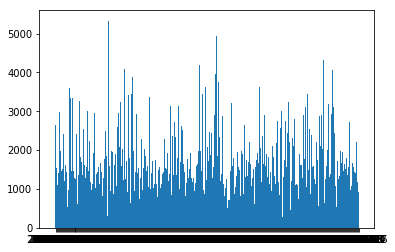

In [80]:
import matplotlib.pyplot as plt

labels, values = zip(*trans.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()